## Лабораторна робота №4
## Виконав ст. групи КМ-01
## Шолоп Любомир

In [1]:
import time
start_timer = time.time()

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from keras import layers, models
from keras.optimizers import SGD 
from keras.datasets import cifar10
from keras.utils import to_categorical

### Передобробка даних

In [2]:
# Завантажимо дані
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Нормалізуємо дані 
X_train = X_train / 255.0 
X_test  = X_test / 255.0 

# Створимо мітки класів
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test,  10)

# Створимо валідаційну вибірку для тестування моделі на кожній епосі
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=10)

# Ініціалізуємо розмір навчальної вибірки на кожній епосі
batch_size = 32

# Інііалізуємо назви класів датасету cifar 10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Отримані набори даних

In [3]:
print(f'Записів у тренувальній вибірці: {len(X_train)}')
print(f'Записів у тестовій вибірці: {len(X_test)}')
print(f'Записів у валідаційній вибірці: {len(X_val)}')

Записів у тренувальній вибірці: 50000
Записів у тестовій вибірці: 5000
Записів у валідаційній вибірці: 5000


### Вигляд картинок у датасеті

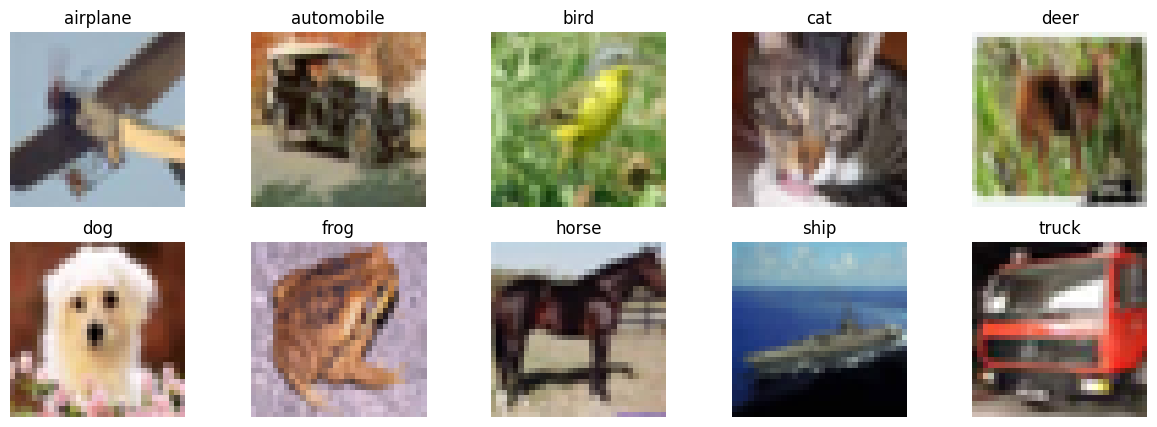

In [4]:
selected_images = []
selected_labels = []

for class_index in range(10):
    index = np.where(np.argmax(y_train, axis=1) == class_index)[0][42]
    selected_images.append(X_train[index])
    selected_labels.append(y_train[index])

plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i])
    plt.title(class_names[np.argmax(selected_labels[i])])
    plt.axis('off')

plt.show()

### Ініціалізуємо структуру згорткової мережі (CNN)

In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Додавання повнозв'язних шарів
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))  # 10 класів виводу

# Компіляція моделі
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Навчання моделі

In [6]:
try:
    model = models.load_model('my_model.keras')
except:
    history = model.fit(X_train, y_train, 
                        epochs=25, 
                        batch_size=batch_size, 
                        validation_data=(X_val, y_val))
    model.save('my_model.keras') # Зберігаємо модель

Epoch 1/25
1563/1563 [==============================] - 66s 39ms/step - loss: 1.8808 - accuracy: 0.3000 - val_loss: 1.4999 - val_accuracy: 0.4416
Epoch 2/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5124 - accuracy: 0.4499 - val_loss: 1.3673 - val_accuracy: 0.5070
Epoch 3/25
1563/1563 [==============================] - 57s 37ms/step - loss: 1.3902 - accuracy: 0.5013 - val_loss: 1.2356 - val_accuracy: 0.5506
Epoch 4/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3156 - accuracy: 0.5363 - val_loss: 1.2193 - val_accuracy: 0.5684
Epoch 5/25
1563/1563 [==============================] - 50s 32ms/step - loss: 1.2639 - accuracy: 0.5561 - val_loss: 1.1079 - val_accuracy: 0.6088
Epoch 6/25
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2252 - accuracy: 0.5710 - val_loss: 1.1297 - val_accuracy: 0.5988
Epoch 7/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1941 - accuracy: 0.5816 - val_loss: 1.0443 -

### Тестування моделі

In [7]:
test_results = model.evaluate(X_test, y_test, verbose=0)

test_accuracy = test_results[1]
predictions = np.argmax(model.predict(X_test, verbose=0), axis=1)
test_precision = precision_score(np.argmax(y_test, axis=1), predictions, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), predictions, average='weighted')
test_f1_score = f1_score(np.argmax(y_test, axis=1), predictions, average='weighted')

metrics = pd.DataFrame({
    'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Значення': [test_accuracy, test_precision, test_recall, test_f1_score]
})

print("Метрики моделі на тестових даних:")
print(metrics.to_string(index=False))

Метрики моделі на тестових даних:
  Метрика  Значення
 Accuracy  0.691400
Precision  0.700315
   Recall  0.691400
 F1-score  0.686122


### Час роботи програми

In [8]:
elapsed_time = time.time() - start_timer
minutes, seconds = divmod(elapsed_time, 60)

if minutes > 0:
    print(f'Час роботи: {int(minutes)} хв, {int(seconds)} сек')
else:
    print(f'Час роботи: {int(seconds)} сек')

Час роботи: 24 хв, 55 сек
